In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.rcParams.update({'font.size': 14})

## Notebook di analisi
L'obiettivo di questo progetto è quello di rispondere alla seguente domanda: "Quando le terapie intensive, nello specifico quelle Lombarde, potranno ritenersi libere da casi COVID19?   
Realizzando quindi un modello di previsione, che poi andremo a sperimentare in altre regioni.  
In fondo al notebook si troveranno i vari link ai dataset utilizzati per i seguenti grafici.  
Nello specifico le analisi collegate al nostro obiettivo partiranno dal paragrafo "Grafici Protezione Civile".

### Grafici Francia

Con questo primo grafico andiamo a visualizzare la crescita esponenziale del numero di attualmente positivi in Francia, fino al giorno 26/03/2020.

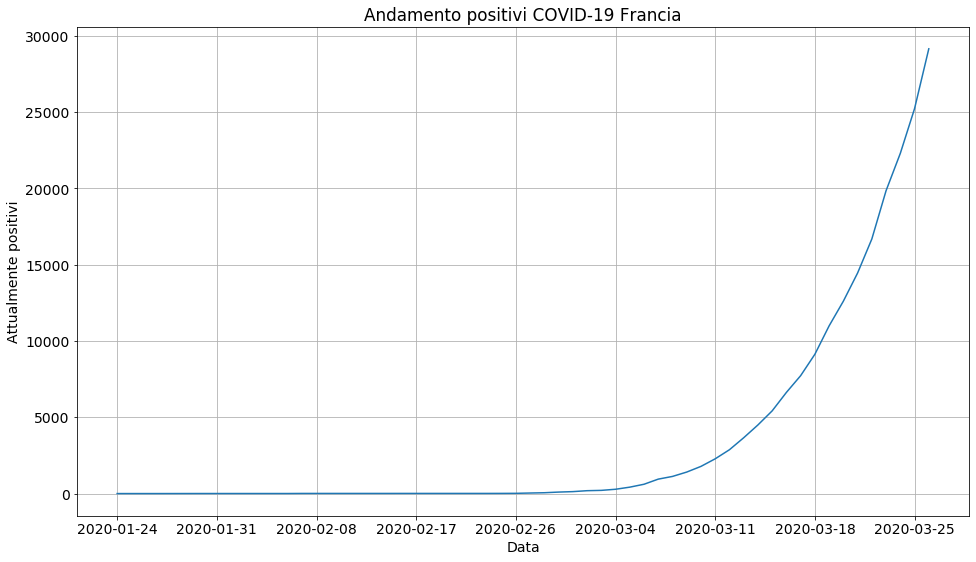

In [94]:
franceDataset = pd.read_csv("Datasets/Francia/france_clean.csv")

#Recupero la lista delle date presenti per la nazione (X axis)
date = franceDataset[franceDataset["maille_nom"] == "France"]["date"].tolist()

#Recupero il numero dei casi positivi per giorno per la nazione (Y axis)
numeroPositivi = franceDataset[franceDataset["maille_nom"] == "France"]["cas_confirmes"].tolist()

#Creo il grafico e lo customizzo
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, numeroPositivi)
ax.set(xlabel = 'Data', ylabel = 'Attualmente positivi', title = 'Andamento positivi COVID-19 Francia')
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

#Mostro il grafico
plt.show()

Con i seguenti istogrammi andiamo a confrontare l'incremento dei casi totali nelle quattro regioni francesi maggiormente colpite.

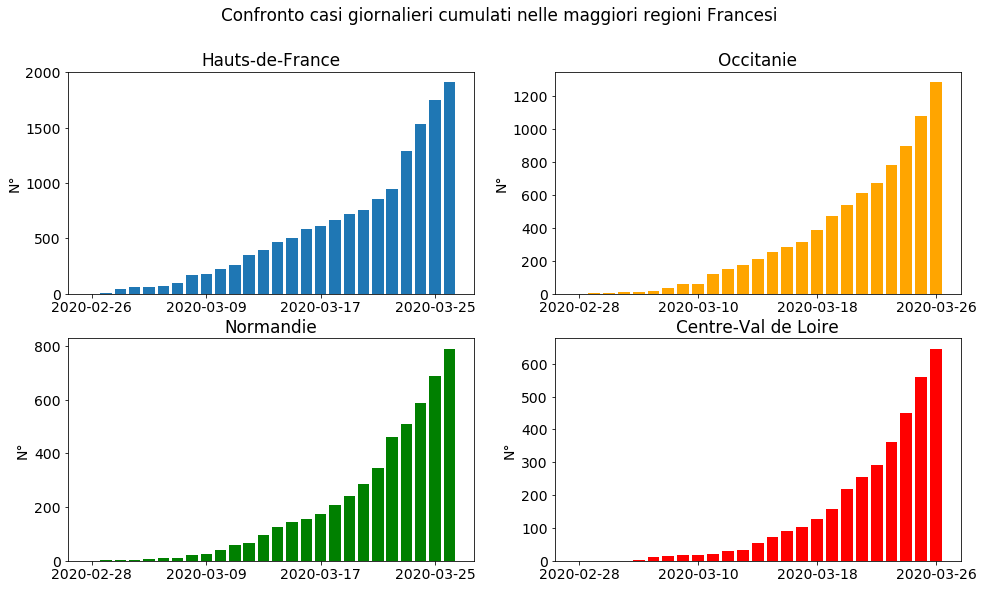

In [95]:
# Recupero l'ultimo giorno del dataset
lastDay = franceDataset["date"].iloc[-1]

# Recupero i nomi delle 4 regioni con più casi
region = franceDataset[franceDataset["date"] == lastDay]
region = region[region["granularite"] == "region"]
region = region.sort_values(by=['cas_confirmes'], ascending=False)
topFourRegion = region["maille_nom"].iloc[0:4].tolist()

# Recupero la lista delle date
date = franceDataset["date"].unique().tolist()
maxDate = max(date)

# Recupero la lista dei casi positivi per regione
region_1 = franceDataset[franceDataset['maille_nom'] == topFourRegion[0]]
totaleCasiR1 = region_1['cas_confirmes'].values
region_2 = franceDataset[franceDataset['maille_nom'] == topFourRegion[1]]
totaleCasiR2 = region_2['cas_confirmes'].values
region_3 = franceDataset[franceDataset['maille_nom'] == topFourRegion[2]]
totaleCasiR3 = region_3['cas_confirmes'].values
region_4 = franceDataset[franceDataset['maille_nom'] == topFourRegion[3]]
totaleCasiR4 = region_4['cas_confirmes'].values

#Creo il grafico e lo customizzo
fig, ax = plt.subplots(2,2,figsize=(16,9))
ax[0,0].bar(region_1["date"].unique().tolist(), totaleCasiR1,label='Casi giornalieri %s' %(topFourRegion[0]))
ax[0,1].bar(region_2["date"].unique().tolist(), totaleCasiR2,label='Casi giornalieri %s' %(topFourRegion[1]),color='orange')
ax[1,0].bar(region_3["date"].unique().tolist(), totaleCasiR3,label='Casi giornalieri %s' %(topFourRegion[2]),color='green')
ax[1,1].bar(region_4["date"].unique().tolist(), totaleCasiR4,label='Casi giornalieri %s' %(topFourRegion[2]),color='red')
label=topFourRegion
fig.suptitle('Confronto casi giornalieri cumulati nelle maggiori regioni Francesi')
for axs,l in zip(ax.flat,label):
    axs.set(ylabel = 'N°', title=l)
    axs.xaxis.set_major_locator(MultipleLocator(8))

plt.show()

### Dataset Kaggle COVID19

Questo grafico rappresenta le curve di contagio dei tre paesi più colpiti al 26/03/2020, in questo caso abbiamo USA, Cina ed Italia.

Possiamo vedere come i casi in Cina si stiano stabilizzando dal 20/02/2020, ciò è dovuto probabilmente alla quarantena immediata imposta dal governo cinese.

Mentre, per quanto riguarda gli USA e l'Italia abbiamo una crescita maggiormente esponenziale, soprattutto negli USA in quanto non sono state applicate misure di contenimento in modo tempestivo.

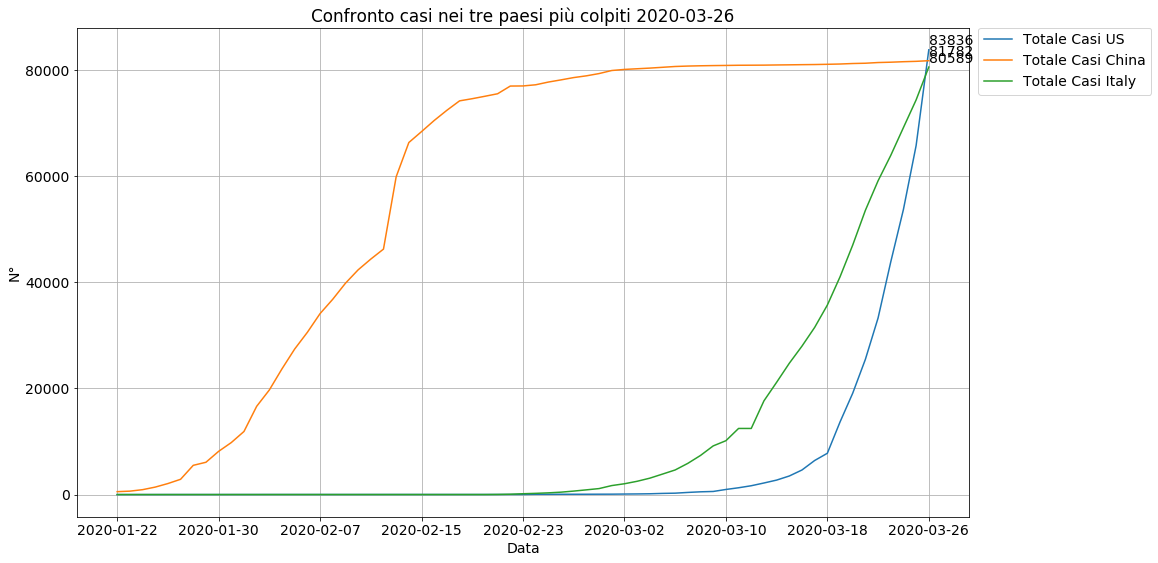

In [96]:
kaggleDataset = pd.read_csv("Datasets/Kaggle/covid_19_clean_complete_clean.csv")

#Recupero la lista delle date e la data più recente (X axis)
date = kaggleDataset["Date"].unique().tolist()
maxDate = max(date)

#Recupero lae righe relative all'ultimo giorno
lastDay = kaggleDataset[kaggleDataset['Date']==maxDate]

#Recupero i tre paesi con il numero di casi confermato più alto
summedConfirmed = lastDay.groupby(['Country/Region'])['Confirmed'].sum().nlargest(3)
summedConfirmed = pd.DataFrame(summedConfirmed)
summedConfirmed.reset_index(inplace=True)
paesi = summedConfirmed['Country/Region'].tolist()

#Creo il grafico e lo customizzo
fig, ax = plt.subplots(figsize=(16,9))
not_so_beautifull_vertical_shift = int(max(summedConfirmed['Confirmed'].tolist())) * 0.01
for p in paesi:
    dataframe = kaggleDataset[kaggleDataset['Country/Region']==p]
    dataframe = dataframe.groupby(['Date'])['Confirmed'].sum()
    dataframe = pd.DataFrame(dataframe)
    dataframe.reset_index(inplace=True)
    ax.plot(date, dataframe['Confirmed'],label='Totale Casi '+p)
    value = summedConfirmed[summedConfirmed['Country/Region']==p]['Confirmed']
    ax.text(maxDate,int(value)+not_so_beautifull_vertical_shift,str(int(summedConfirmed[summedConfirmed['Country/Region']==p]['Confirmed'])))
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Confronto casi nei tre paesi più colpiti '+maxDate )
ax.xaxis.set_major_locator(MultipleLocator(8))
ax.grid()
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Mostro il grafico
plt.show()

Questo grafico rappresenta le curve dei tre paesi con il numero maggiore di decessi al 26/03/2020, in questo caso abbiamo Italia, Spagna e Cina.

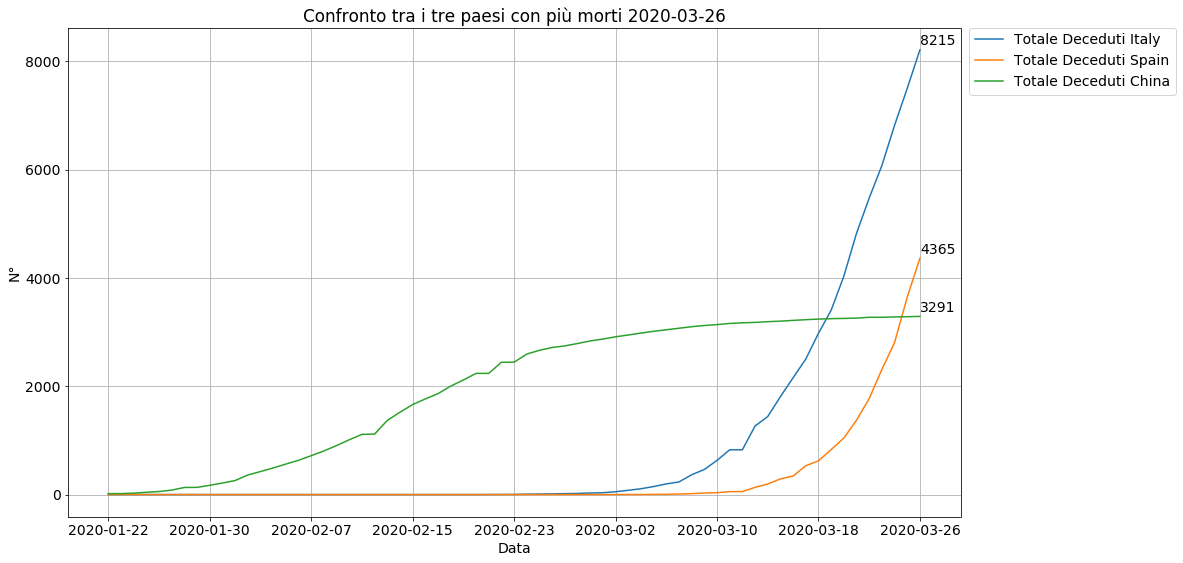

In [97]:
#Recupero la lista delle date e la data più recente (X axis)
date = kaggleDataset["Date"].unique().tolist()
maxDate = max(date)

#Recupero lae righe relative all'ultimo giorno
lastDay = kaggleDataset[kaggleDataset['Date']==maxDate]

#Recupero i tre paesi con il numero di decessi più alto
summedDeaths = lastDay.groupby(['Country/Region'])['Deaths'].sum().nlargest(3)
summedDeaths = pd.DataFrame(summedDeaths)
summedDeaths.reset_index(inplace=True)
paesi = summedDeaths['Country/Region'].tolist()

#Creo il grafico e lo customizzo
fig, ax = plt.subplots(figsize=(16,9))
not_so_beautifull_vertical_shift = int(max(summedDeaths['Deaths'].tolist())) * 0.01
for p in paesi:
    dataframe = kaggleDataset[kaggleDataset['Country/Region']==p]
    dataframe = dataframe.groupby(['Date'])['Deaths'].sum()
    dataframe = pd.DataFrame(dataframe)
    dataframe.reset_index(inplace=True)
    ax.plot(date, dataframe['Deaths'],label='Totale Deceduti '+p)
    value = summedDeaths[summedDeaths['Country/Region']==p]['Deaths']
    ax.text(maxDate,int(value)+not_so_beautifull_vertical_shift,str(int(summedDeaths[summedDeaths['Country/Region']==p]['Deaths'])))
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Confronto tra i tre paesi con più morti '+maxDate )
ax.xaxis.set_major_locator(MultipleLocator(8))
ax.grid()
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Mostro il grafico
plt.show()

Quest'ultimo grafico rappresenta le curve dei tre paesi con il maggior numero di guarigioni. In questo caso abbiamo Cina, Iran ed Italia.

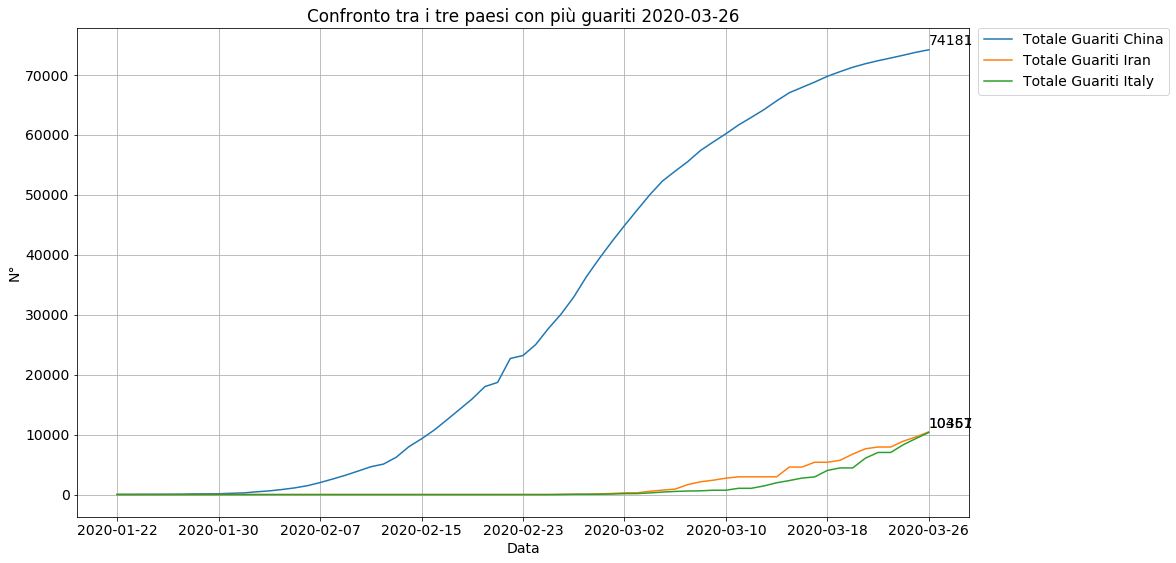

In [98]:
#Recupero la lista delle date e la data più recente (X axis)
date = kaggleDataset["Date"].unique().tolist()
maxDate = max(date)

#Recupero lae righe relative all'ultimo giorno
lastDay = kaggleDataset[kaggleDataset['Date']==maxDate]

#Recupero i tre paesi con il numero di guariti più alto
summedRecovered = lastDay.groupby(['Country/Region'])['Recovered'].sum().nlargest(3)
summedRecovered = pd.DataFrame(summedRecovered)
summedRecovered.reset_index(inplace=True)
paesi = summedRecovered['Country/Region'].tolist()

#Create il grafico
fig, ax = plt.subplots(figsize=(16,9))
not_so_beautifull_vertical_shift = int(max(summedRecovered['Recovered'].tolist())) * 0.01
for p in paesi:
    dataframe = kaggleDataset[kaggleDataset['Country/Region']==p]
    dataframe = dataframe.groupby(['Date'])['Recovered'].sum()
    dataframe = pd.DataFrame(dataframe)
    dataframe.reset_index(inplace=True)
    ax.plot(date, dataframe['Recovered'],label='Totale Guariti '+p)
    value = summedRecovered[summedRecovered['Country/Region']==p]['Recovered']
    ax.text(maxDate,int(value)+not_so_beautifull_vertical_shift,str(int(summedRecovered[summedRecovered['Country/Region']==p]['Recovered'])))
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Confronto tra i tre paesi con più guariti '+maxDate )
ax.xaxis.set_major_locator(MultipleLocator(8))
ax.grid()
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Mostro il grafico
plt.show()

Con questo primo istogramma vogliamo evidenziare il numero dei contagiati che hanno o non hanno visitato Wuhan.

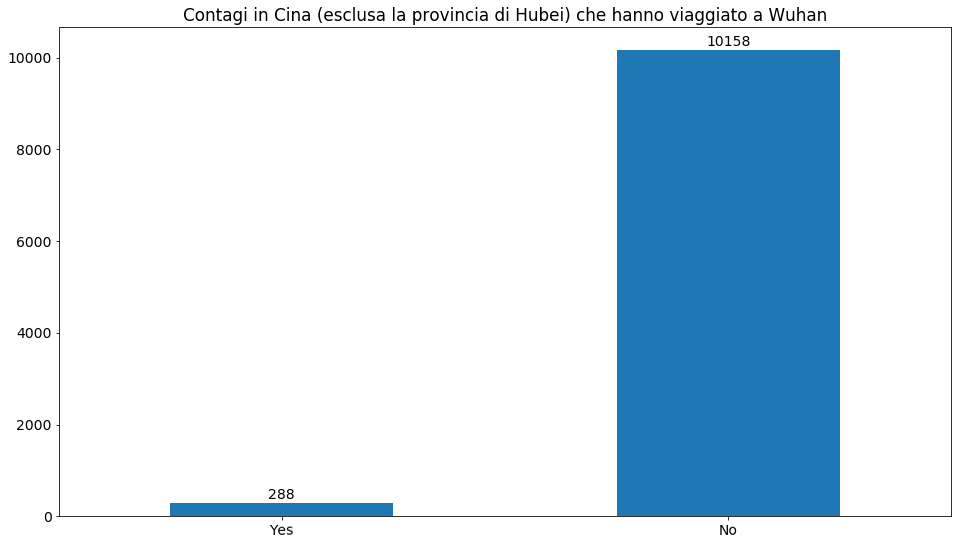

In [99]:
kaggleDataset = pd.read_csv("Datasets/Kaggle/COVID19_open_line_list_clean.csv")

#Recupero i dati relativi alla Cina
kaggleDatasetChina = kaggleDataset[kaggleDataset["country"] == "China"]

#Recupero il numero di persone che sono state o no a Wuhan
travelY = kaggleDatasetChina[kaggleDatasetChina["travel_in_Wuhan"] == True]["travel_in_Wuhan"].count()
travelN = kaggleDatasetChina[kaggleDatasetChina["travel_in_Wuhan"] == False]["travel_in_Wuhan"].count()

#Imposto i dati
label = ["Yes", "No"]
travel = pd.DataFrame([travelY, travelN])

#Creo il grafico
ax = travel.plot.bar(title="Contagi in Cina (esclusa la provincia di Hubei) che hanno viaggiato a Wuhan", figsize=(16,9), rot=1)
ax.get_legend().remove()
plt.xticks(np.arange(2), label)
not_so_beautifull_vertical_shift = int(max(travelY, travelN)) * 0.01
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')    

#Mostro il grafico
plt.show()

Nel secondo istogramma possiamo analizzare la distribuzione del numero dei contagi nelle diverse fasce di età.

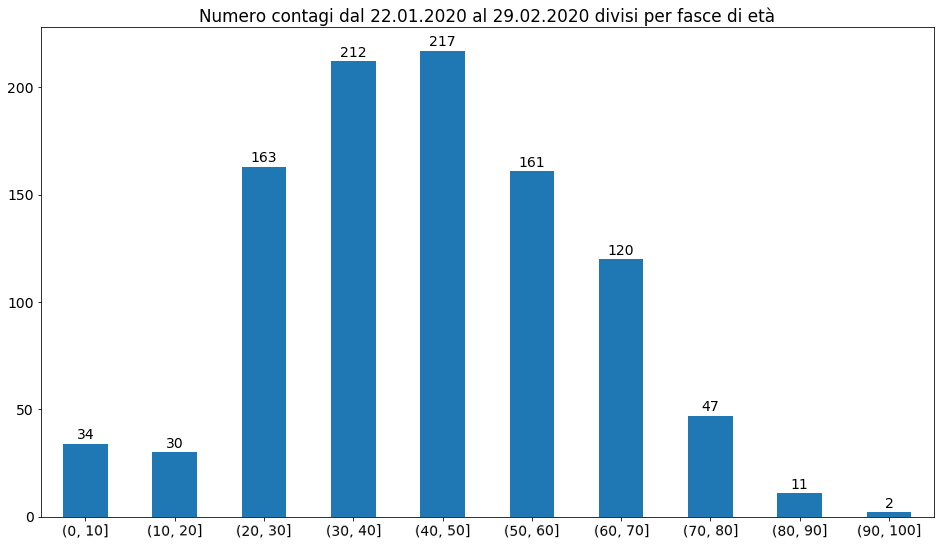

In [100]:
#Recupero i dati relativi all'età
kaggleEta =kaggleDataset[['age']].copy()

#creo una colonna con i dati categorici dell'età
kaggleEta['age_cat'] = pd.cut(kaggleEta['age'],list(range(0,110,10))) 

#Conto il numero di persone appartenenti a ciascuna categoria di età
kaggleEta = kaggleEta.groupby(['age_cat'])['age'].count()

#converto a dataframe
kaggleEta = pd.DataFrame(kaggleEta)
kaggleEta.reset_index(inplace=True)

#Recupero le label per l'asse X
label = kaggleEta['age_cat'].tolist()

#Recupero le informazioni da allegare al grafico
maxDate = kaggleDataset['date_confirmation'].tolist()[-1]
minDate = kaggleDataset['date_confirmation'].tolist()[0]

#Creo il grafico
ax = kaggleEta.plot.bar(title="Numero contagi dal "+str(minDate)+" al "+str(maxDate)+" divisi per fasce di età", figsize=(16,9), rot=1)
ax.get_legend().remove()
plt.xticks(np.arange(len(label)), label)
not_so_beautifull_vertical_shift = int(max(kaggleEta['age'].tolist())) * 0.01
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')    

#Mostro il grafico
plt.show()

Infine, con il seguente grafico a torta vediamo in che percentuale è stata colpita la polazione in base al genere.

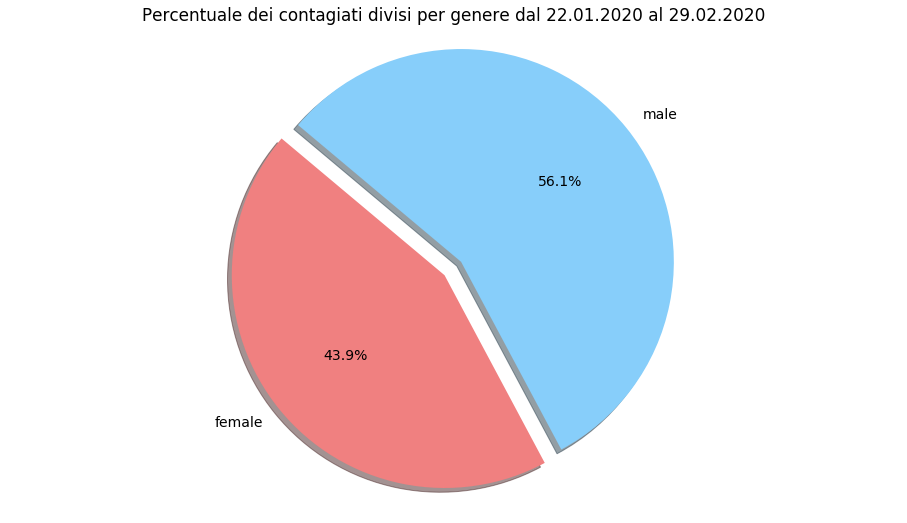

In [101]:
#Carico la colonna del genere
kaggleSex = kaggleDataset[['sex']]
kaggleSex = kaggleSex['sex'].apply(lambda x: str.lower(str(x)))
kaggleSex = pd.DataFrame(kaggleSex)

#Rimuovo eventuali NaN per il conteggio
kaggleSex = kaggleSex[kaggleSex['sex'] != 'nan']
kaggleSex = kaggleSex.groupby(['sex'])['sex'].count()
kaggleSex = pd.DataFrame(kaggleSex)
kaggleSex.rename(columns={'sex':'count'},inplace=True)
kaggleSex.reset_index(inplace=True)

#Recupero le informazioni da allegare al grafico
maxDate = kaggleDataset['date_confirmation'].tolist()[-1]
minDate = kaggleDataset['date_confirmation'].tolist()[0]

#I dati su cui elaborare il grafico
label = kaggleSex['sex'].tolist()
sizes = kaggleSex['count'].tolist()
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

#Creo il grafico
fig,ax = plt.subplots(figsize=(16,9))
ax.pie(sizes, explode=explode, labels=label, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title("Percentuale dei contagiati divisi per genere dal "+str(minDate)+" al "+str(maxDate))
plt.axis('equal')

#Mostro il grafico
plt.show()

### Grafici GDP e Health

Con questo istogramma andiamo a cercare una eventuale correlazione tra il numero di contagiati, il PIL dello stato e la spesa pubblica per la sanità.

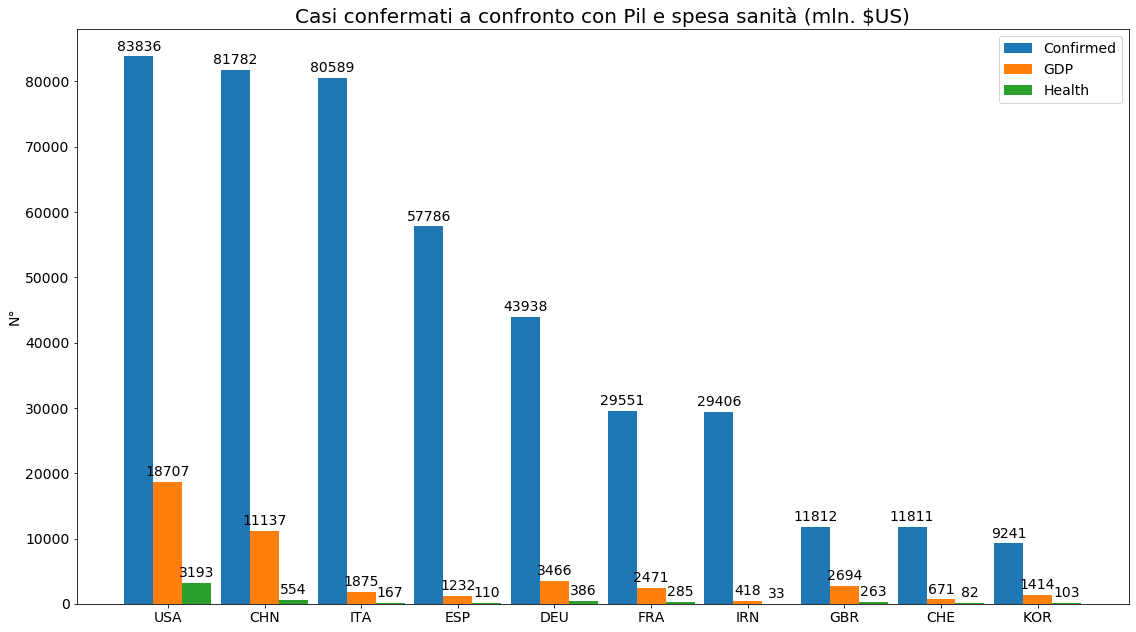

In [102]:
gdpDataset = pd.read_csv("Datasets/GDP/GDP_HEALTH_per_country_clean.csv")
kaggleDataset = pd.read_csv("Datasets/Kaggle/covid_19_clean_complete_clean.csv")

#Recupero l'ultima data
lastDay = kaggleDataset.sort_values(by=["Date"])["Date"].iloc[-1]

#Recupero le top 10 nazioni per n. infetti
topTenInfection = kaggleDataset[kaggleDataset["Date"] == lastDay]
topTenInfection = topTenInfection.groupby(["Country/Region"])["Confirmed"].sum().nlargest(10)
topTenInfection = pd.DataFrame(topTenInfection)
topTenInfection.reset_index(inplace=True)
listC = topTenInfection["Country/Region"].tolist()

#Recupero i dati del GDP/Health in base alle 10 nazioni precedentemente trovate
gdpDataset = gdpDataset[gdpDataset["Country Name"].isin(listC)]

#Effettuo una join tra i due dataset sulla base del country name
resultingDF = gdpDataset.set_index("Country Name").join(topTenInfection.set_index("Country/Region")).sort_values(by=["Confirmed"], ascending=False)

#Recupero i dati
labels = resultingDF["Country Code"].tolist()
confirmed = resultingDF["Confirmed"].tolist()
health = resultingDF["HEALTH 2016"].tolist()
gdp = resultingDF["GDP 2016"].tolist()

#Eseguo una scala sui valori di Health e Gdp, in modo da adattarli al grafico
healthReduced = []
for number in health:
    healthReduced.append(int(number / 1000000000))
gdpReduced = []
for number in gdp:
    gdpReduced.append(int(number / 1000000000))
    
#Preparo il grafico
x = np.arange(len(labels))
width = 0.3 

fig, ax = plt.subplots(figsize=(16,9))
axConfirmed = ax.bar(x - width, confirmed, width, label='Confirmed')
axGDP = ax.bar(x, gdpReduced, width, label='GDP')
axHealth = ax.bar(x + width, healthReduced, width, label='Health')

# Customizzazioni
ax.set_ylabel('N°')
ax.set_title('Casi confermati a confronto con Pil e spesa sanità (mln. $US)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

#Richiamo la funzione autolabel per mettere delle etichette sopra le barre
autolabel(axConfirmed)
autolabel(axGDP)
autolabel(axHealth)

fig.tight_layout()

plt.show()

### Grafici Dati Protezione Civile

Con questo primo grafico mostriamo l'andamento del numero totale degli attualmente positivi in Italia, fino all'ultimo giorno disponibile nel dataset.  
Evidenziamo come la crescita della curva si stia stabilizzando nelle ultime settimane. Prevediamo che l'andamento, dopo un periodo di stabilità sui 110'000 circa, inizierà la sua discesa (in base al primo dato negativo risalente al 20/04).

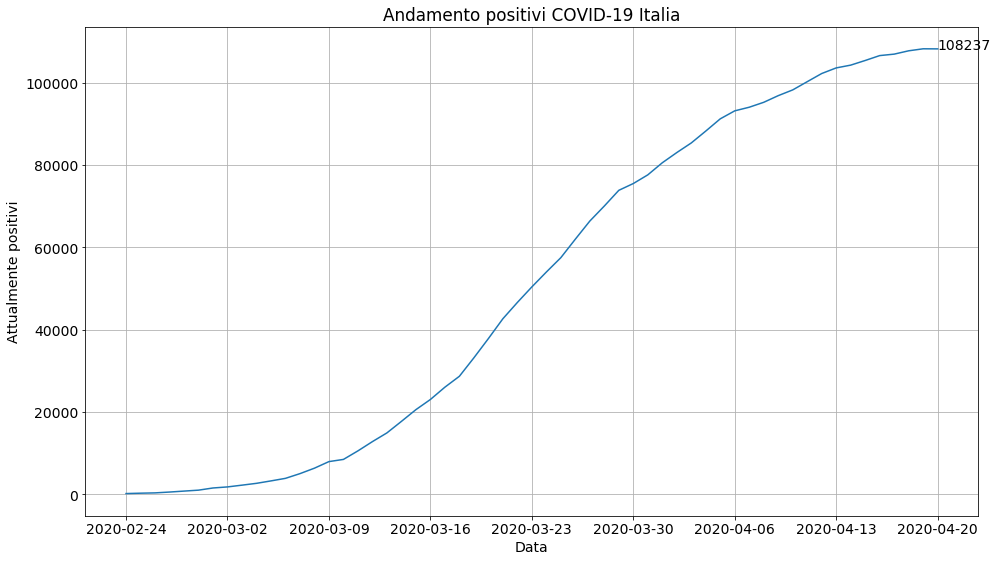

In [145]:
pcDataset = pd.read_csv("Datasets/ProtezioneCivile/dpc-covid19-ita-andamento-nazionale_clean.csv")

#Recupero la lista delle date (X axis)
date = pcDataset["data"].tolist()
maxDate = max(date)

#Recupero la lista dei positivi al COVID19 (Y axis)
numeroPositivi = pcDataset["totale_positivi"].tolist()
maxNumPos = numeroPositivi[-1]

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
graph = ax.plot(date, numeroPositivi)
ax.set(xlabel = 'Data', ylabel = 'Attualmente positivi', title = 'Andamento positivi COVID-19 Italia')
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

ax.text(maxDate,maxNumPos+3,str(maxNumPos))

#Show plot
plt.show()

Con questo istogramma andiamo a comparare gli attualmente positivi al COVID-19, con il numero di guariti e il numero di deceduti.

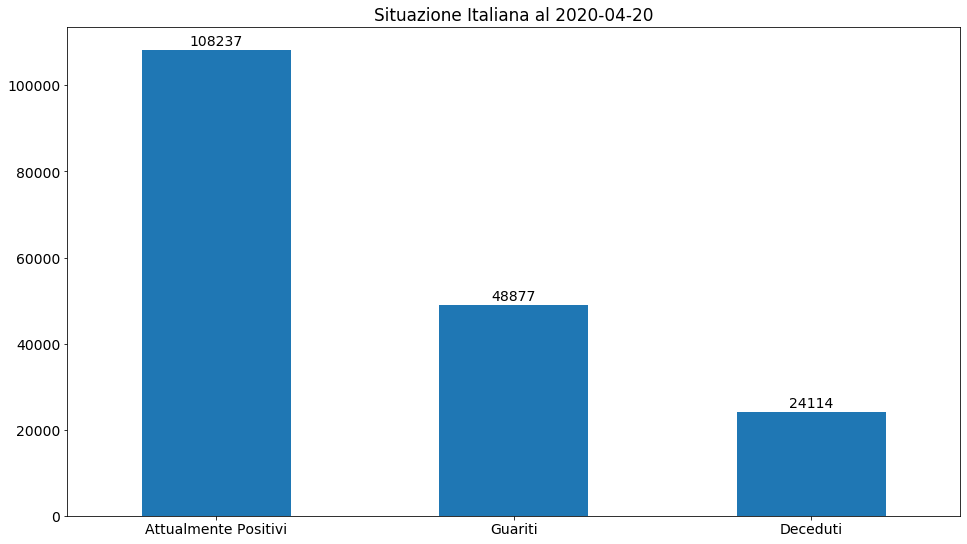

In [108]:
#Imposto le label dell'asse X
label = ["Attualmente Positivi", "Guariti", "Deceduti"]

#Recupero il giorno più recente nel dataset e relativi dati
lastDay = pcDataset[["totale_positivi", "dimessi_guariti", "deceduti"]].iloc[-1]
date = pcDataset['data'].iloc[-1]

#Create plot
fig, ax = plt.subplots(figsize=(16,9))
ax = lastDay.plot.bar(rot = 0, title="Situazione Italiana al %s" %(date))
plt.xticks(np.arange(3), label)
not_so_beautifull_vertical_shift = int(max(lastDay.loc[['totale_positivi', 'dimessi_guariti','deceduti']].tolist())) * 0.01
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')

#Show plot
plt.show()

Con il seguente grafico compariamo il numero totale dei tamponi effettuati con il numero totale dei casi positivi al COVID-19 a livello nazionale, fino all'ultima data disponibile.

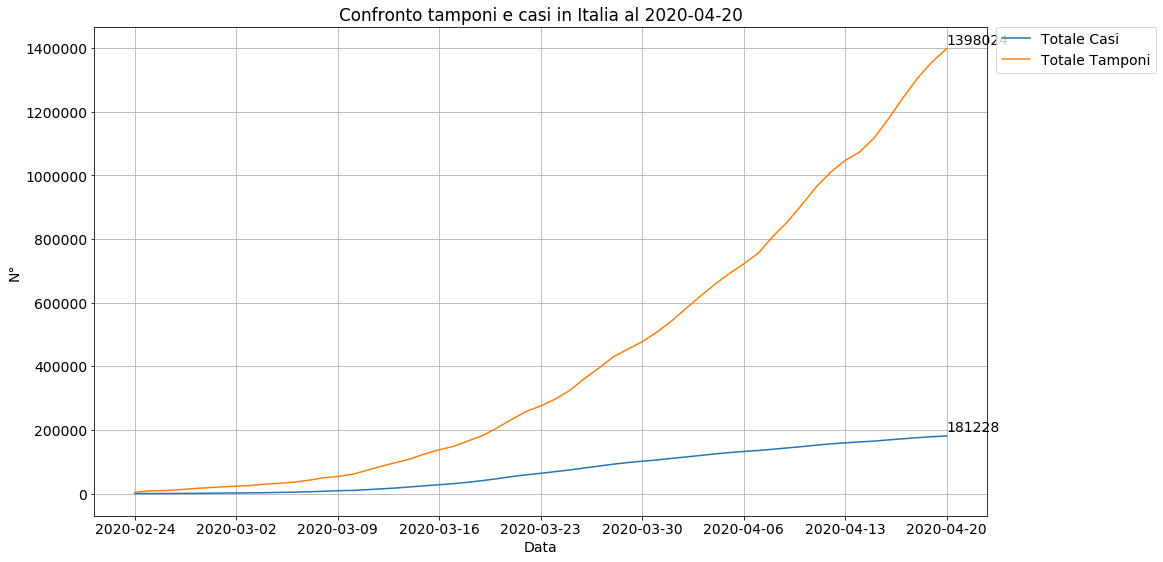

In [110]:
#Recupero le date (X axis)
date = pcDataset["data"].tolist()
maxDate = max(date)

#Recupero il numero totale di casi di COVID19 (Y axis)
totaleCasi = pcDataset["totale_casi"].tolist()
maxTotaleCasi = max(totaleCasi)

#Recupero il numero totale di tamponi per il COVID19 (Y axis)
numeroTamponi = pcDataset["tamponi"].tolist()
maxNumeroTamponi = max(numeroTamponi)

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, totaleCasi,label='Totale Casi')
ax.plot(date, numeroTamponi,label='Totale Tamponi')
not_so_beautifull_vertical_shift = int(max([maxTotaleCasi,maxNumeroTamponi])) * 0.01
ax.text(maxDate,maxTotaleCasi+not_so_beautifull_vertical_shift,str(maxTotaleCasi))
ax.text(maxDate,maxNumeroTamponi+not_so_beautifull_vertical_shift,str(maxNumeroTamponi))
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Confronto tamponi e casi in Italia al '+maxDate )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

In questo nuovo grafico mostriamo l'andamento dei nuovi casi giornalieri relativo alle quattro regioni più colpite.  
Si può vedere che la Lombardia, dopo i picchi del mese di marzo si stia stabilizzando al livello delle altre regioni. Ciò è sicuramente dovuto anche alle limitazioni imposte dal governo riguardo alla possibilità di muoversi all'interno del territorio.

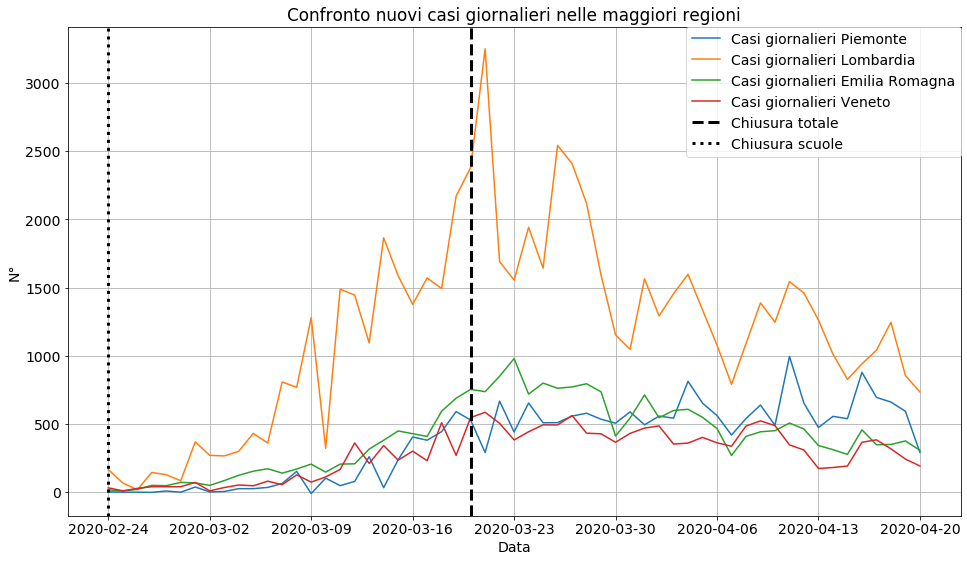

In [189]:
dataset_measures = pd.read_csv("Datasets/ContainmentMeasures/containment_measures_clean.csv")
italia = dataset_measures[dataset_measures['Country']=='Italy']

#data_stato_emergenza = min(italia[italia['Keywords']=='public announcement, special management arrangements, state of emergency']['Date Start'].unique().tolist())
data_chiusura_totale = min(italia[italia['Keywords']=='blanket isolation - no symptoms, compulsory isolation, domestic travel ban, outdoor gatherings banned, public green closure, sports cancellation']['Date Start'].unique().tolist())
data_chiusura_scuole = min(italia[italia['Keywords']=='school closure, university closure']['Date Start'].unique().tolist())


pcProvinciaDataset = pd.read_csv("Datasets/ProtezioneCivile/dpc-covid19-ita-regioni_clean.csv")

#Recupero le date (X axis)
date = pcProvinciaDataset["data"].unique().tolist()
maxDate = max(date)

#Recupero le liste dei nuovi casi giornalieri per le regioni più colpite
piemonte = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Piemonte']
piemonteNuoviCasi = piemonte['nuovi_positivi'].values
lombardia = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Lombardia']
lombardiaNuoviCasi = lombardia['nuovi_positivi'].values
eRomagna = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Emilia-Romagna']
eRomagnaNuoviCasi = eRomagna['nuovi_positivi'].values
veneto = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Veneto']
venetoNuoviCasi = veneto['nuovi_positivi'].values

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, piemonteNuoviCasi,label='Casi giornalieri Piemonte')
ax.plot(date, lombardiaNuoviCasi,label='Casi giornalieri Lombardia')
ax.plot(date, eRomagnaNuoviCasi,label='Casi giornalieri Emilia Romagna')
ax.plot(date, venetoNuoviCasi,label='Casi giornalieri Veneto')

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Confronto nuovi casi giornalieri nelle maggiori regioni' )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()
ax.axvline(x=data_chiusura_totale,linewidth=3, linestyle='--',color='black',label='Chiusura totale')
ax.axvline(x=data_chiusura_scuole,linewidth=3, linestyle=':',color='black', label='Chiusura scuole')



#Add Legend
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

Anche con i seguenti istogrammi vediamo l'andamento dei nuovi contagi giornalieri nelle quattro regioni più colpite.

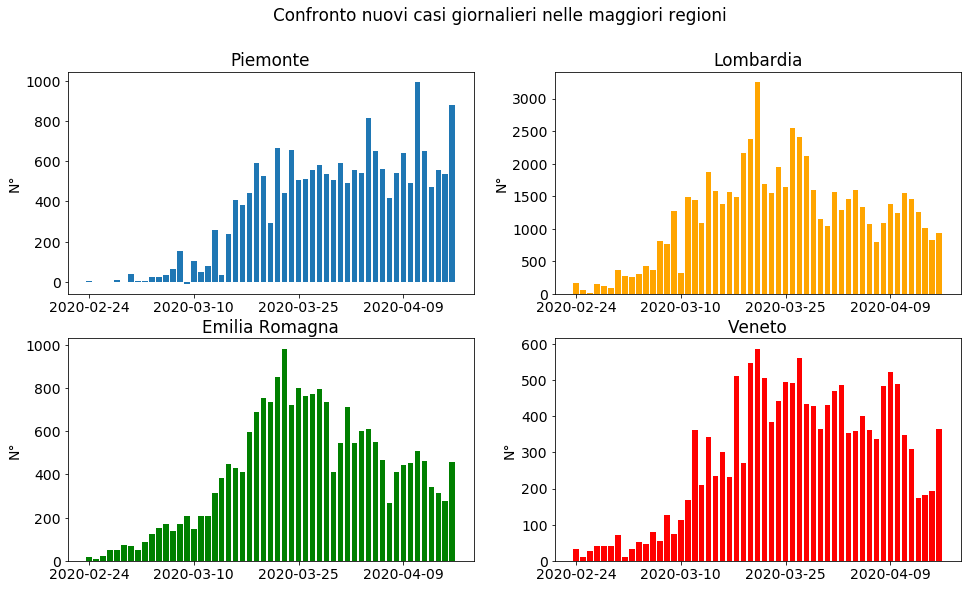

In [113]:
#Create second plot
fig, ax = plt.subplots(2,2,figsize=(16,9))
ax[0,0].bar(date, piemonteNuoviCasi,label='Casi giornalieri Piemonte')
ax[0,1].bar(date, lombardiaNuoviCasi,label='Casi giornalieri Lombardia',color='orange')
ax[1,0].bar(date, eRomagnaNuoviCasi,label='Casi giornalieri Emilia Romagna',color='green')
ax[1,1].bar(date, venetoNuoviCasi,label='Casi giornalieri Veneto',color='red')

#Customize
label=['Piemonte','Lombardia','Emilia Romagna','Veneto']
fig.suptitle('Confronto nuovi casi giornalieri nelle maggiori regioni')
for axs,l in zip(ax.flat,label):
    axs.set(ylabel = 'N°', title=l)
    axs.xaxis.set_major_locator(MultipleLocator(15))


plt.show()

Con quest'ultimo istogramma vediamo il numero di casi totali nelle province lombarde, aggiornato all'ultima data disponibile nel dataset.

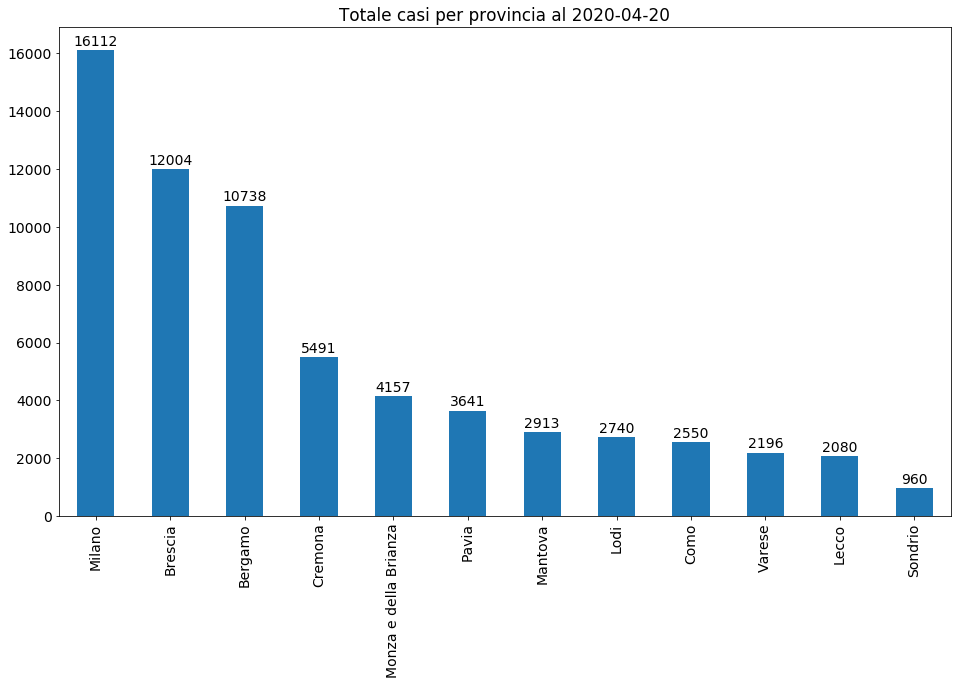

In [147]:
pcProvinciaDataset = pd.read_csv("Datasets/ProtezioneCivile/dpc-covid19-ita-province_clean.csv")

#Recupero l'ultima data disponibile
date = pcProvinciaDataset['data'].iloc[-1]

#Recupero le province lombarde e i loro valori di casi totali
provinceLombardia = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Lombardia']
lastDayProvinceL = provinceLombardia[provinceLombardia['data'] == date].copy()
lastDayProvinceL.sort_values(by='totale_casi',inplace=True,ascending=False)
totaleCasiLastDayProvince = lastDayProvinceL['totale_casi']

#Imposto le label dell'asse X
x_label = lastDayProvinceL['denominazione_provincia'].tolist()

#Create plot
fig, ax = plt.subplots(figsize=(16,9))
ax = totaleCasiLastDayProvince.plot.bar(title='Totale casi per provincia al '+date,rot = 90)
plt.xticks(np.arange(len(x_label)), x_label)
not_so_beautifull_vertical_shift = int(max(totaleCasiLastDayProvince.tolist())) * 0.01
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')

#Show plot
plt.show()

Con questo grafico vogliamo evidenziare il numero dei pazienti ricoverati in terapia intensiva nelle tre regioni più colpite.  
Questa curva segue l'andamento dei nuovi casi giornalieri, evidenziando una diminuzione a partire dal mese di Aprile.

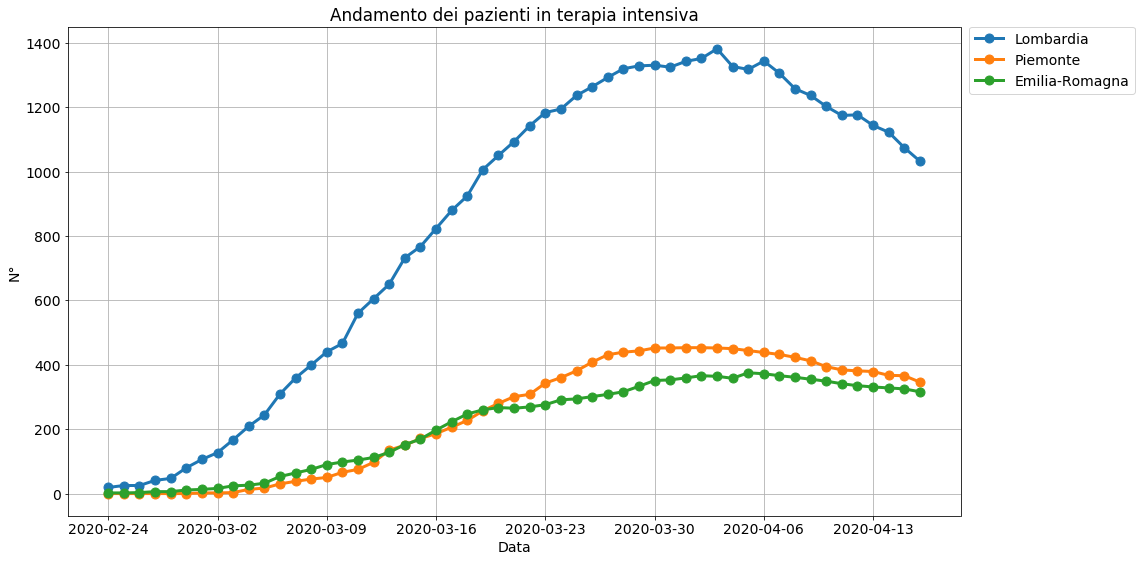

In [118]:
ts_regioni = pd.read_csv("Datasets/ProtezioneCivile/ts_regioni_terapia.csv")

#Riordino in base al valore dell'ultimo giorno utile
ts_regioni=ts_regioni.sort_values(ts_regioni.columns[-1],ascending=False)
#Estraggo le prime tre regioni
ts_regioni =ts_regioni.iloc[:3]
ts_regioni.set_index('denominazione_regione',inplace=True)

#Recupero le date (X axis)
date = ts_regioni.columns.tolist()
maxDate = max(date)

#Recupero le i nomi delle prime 3 regioni
label_regioni = ts_regioni.index.tolist()

#recupero i valori
top_1 = ts_regioni.iloc[0].values.tolist()
top_2 = ts_regioni.iloc[1].values.tolist()
top_3 = ts_regioni.iloc[2].values.tolist()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, top_1,label=label_regioni[0],linewidth=3.0,marker='o',markersize=9)
ax.plot(date, top_2,label=label_regioni[1],linewidth=3.0,marker='o',markersize=9)
ax.plot(date, top_3,label=label_regioni[2],linewidth=3.0,marker='o',markersize=9)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti in terapia intensiva' )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

Con questo grafico vogliamo evidenziare il numero dei pazienti ricoverati in strutture sanitarie nelle tre regioni più colpite, questi valori comprendono i ricoverati nelle terapie intensive.  
A partire dal mese di Aprile possiamo notare come le curve si stiano stabilizzando, avendo probabilmente raggiunto il picco massimo.

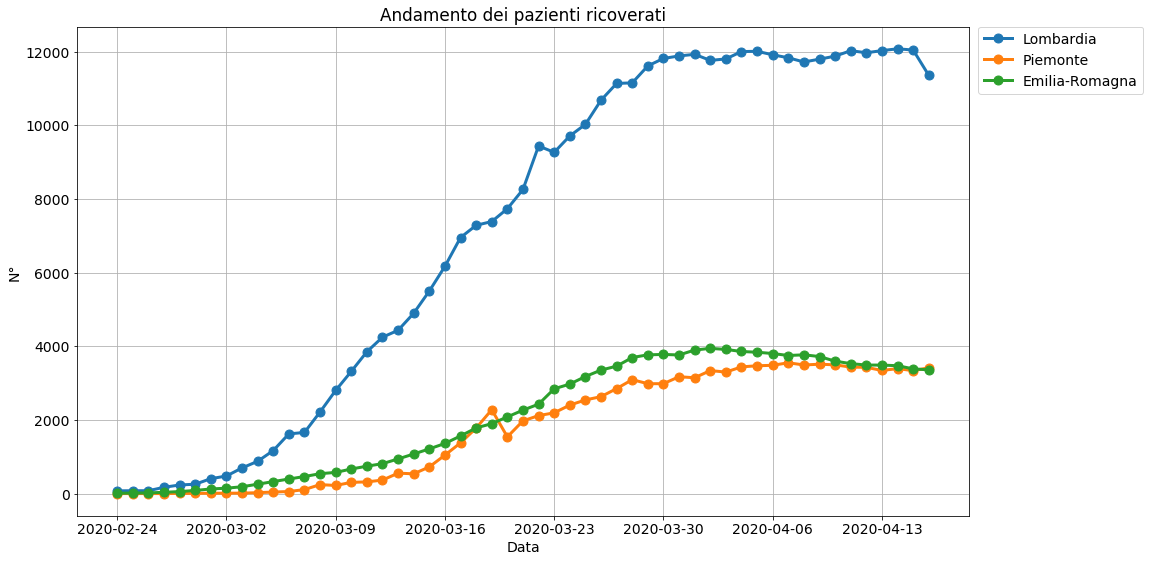

In [119]:
ts_regioni = pd.read_csv("Datasets/ProtezioneCivile/ts_regioni_ricoverati.csv")

#Riordino in base al valore dell'ultimo giorno utile
ts_regioni=ts_regioni.sort_values(ts_regioni.columns[-1],ascending=False)
#Estraggo le prime tre regioni
ts_regioni =ts_regioni.iloc[:3]
ts_regioni.set_index('denominazione_regione',inplace=True)

#Recupero le date (X axis)
date = ts_regioni.columns.tolist()
maxDate = max(date)

#Recupero le i nomi delle prime 3 regioni
label_regioni = ts_regioni.index.tolist()

#Recupero i valori
top_1 = ts_regioni.iloc[0].values.tolist()
top_2 = ts_regioni.iloc[1].values.tolist()
top_3 = ts_regioni.iloc[2].values.tolist()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, top_1,label=label_regioni[0],linewidth=3.0,marker='o',markersize=9)
ax.plot(date, top_2,label=label_regioni[1],linewidth=3.0,marker='o',markersize=9)
ax.plot(date, top_3,label=label_regioni[2],linewidth=3.0,marker='o',markersize=9)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti ricoverati' )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

Vediamo ora l'andamento dei pazienti ricoverati nelle terapie intensive a livello nazionale.  

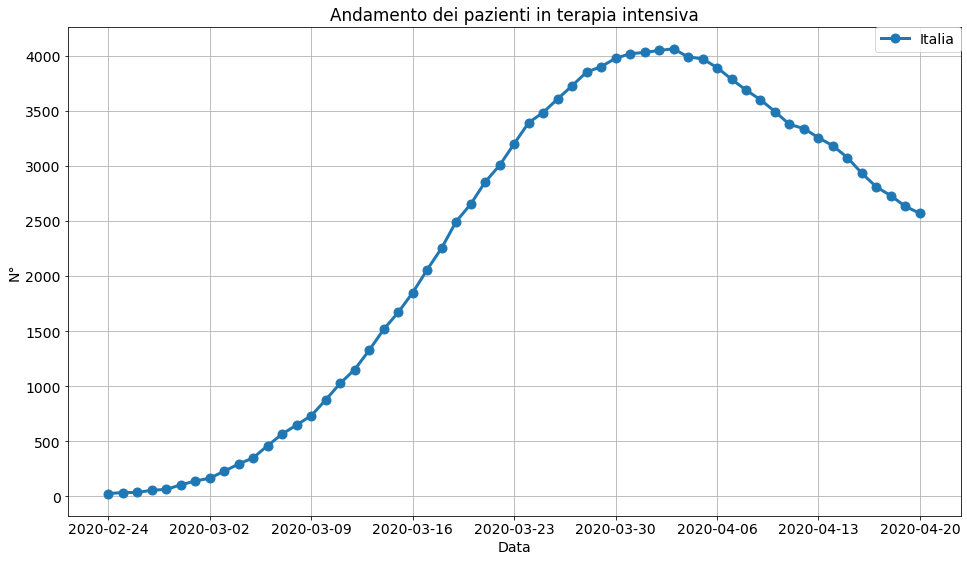

In [148]:
ts_nazione = pd.read_csv("Datasets/ProtezioneCivile/ts_nazioni_terapia.csv")

#Imposto l'index = prima colonna, in modo da avere nelle colonne solo i valori utili
ts_nazione.set_index(ts_nazione.columns[0],inplace=True)

#Recupero la lista delle date (X axis)
date = ts_nazione.columns.tolist()
maxDate = max(date)

#Recupero i valori
top_1 = ts_nazione.iloc[0].values.tolist()
#rolling_mean = ts_nazione.iloc[0].T.rolling(window=5).mean()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, top_1,label='Italia',linewidth=3.0,marker='o',markersize=9)
#ax.plot(date, rolling_mean,label='Media mobile',linewidth=2.0)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti in terapia intensiva' )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()


Con il seguente grafico andiamo a vedere l'andamento dei casi di COVID19 in tutta Italia, visualizzando le date che hanno segnato l'inizio delle limitazioni principali imposte dal governo.  
Le limitazioni prese in considerazione riguardano, come prima cosa, la chiusura delle scuole e delle università, successivamente, l'isolamento generale con le limitazioni agli spostamenti, la chiusura di luoghi pubblici e la cancellazione di tutti gli eventi associati allo sport.

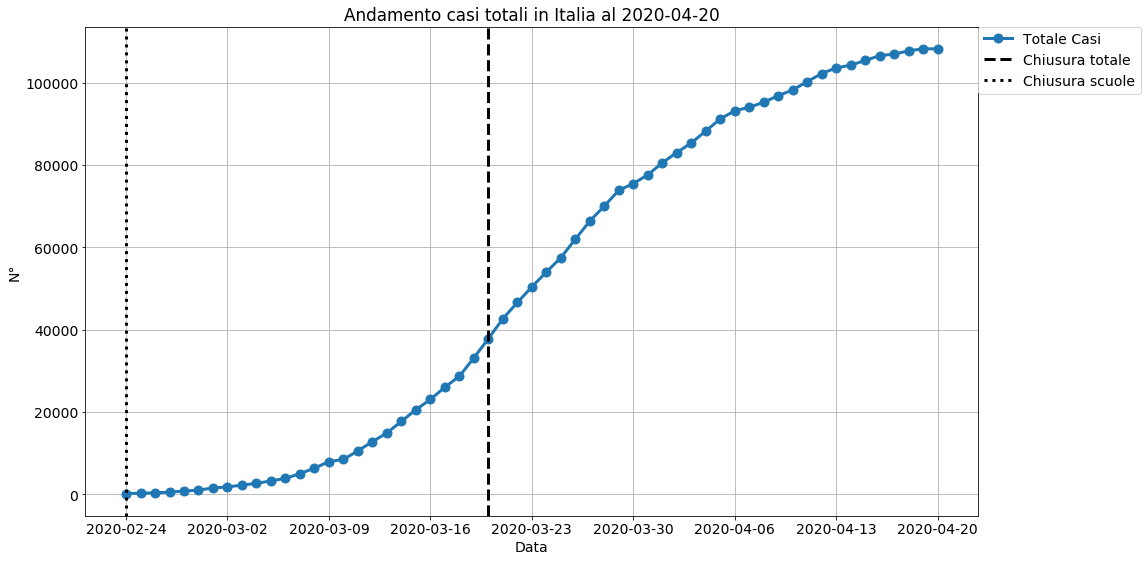

In [194]:
dataset_measures = pd.read_csv("Datasets/ContainmentMeasures/containment_measures_clean.csv")
italia = dataset_measures[dataset_measures['Country']=='Italy']

#data_stato_emergenza = min(italia[italia['Keywords']=='public announcement, special management arrangements, state of emergency']['Date Start'].unique().tolist())
data_chiusura_totale = min(italia[italia['Keywords']=='blanket isolation - no symptoms, compulsory isolation, domestic travel ban, outdoor gatherings banned, public green closure, sports cancellation']['Date Start'].unique().tolist())
data_chiusura_scuole = min(italia[italia['Keywords']=='school closure, university closure']['Date Start'].unique().tolist())

pcDataset = pd.read_csv("Datasets/ProtezioneCivile/dpc-covid19-ita-andamento-nazionale_clean.csv")

#Recupero le date (X axis)
date = pcDataset["data"].tolist()
maxDate = max(date)

#Recupero il numero totale di casi di COVID19 (Y axis)
totaleCasi = pcDataset["totale_positivi"].tolist()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, totaleCasi,label='Totale Casi',linewidth=3.0,marker='o',markersize=9)
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento casi totali in Italia al '+maxDate )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()


ax.axvline(x=data_chiusura_totale,linewidth=3, linestyle='--',color='black',label='Chiusura totale')
ax.axvline(x=data_chiusura_scuole,linewidth=3, linestyle=':',color='black', label='Chiusura scuole')

plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

Con il seguente grafico vediamo invece l'andamento dei pazienti ricoverati in strutture ospedaliere, in questo grafico sono inclusi anche i pazienti delle terapie intensive.  
Vediamo come la chiusura totale abbia influito, nel giro di una settimana, sulla stabilizzazione del numero dei ricoverati in Italia.

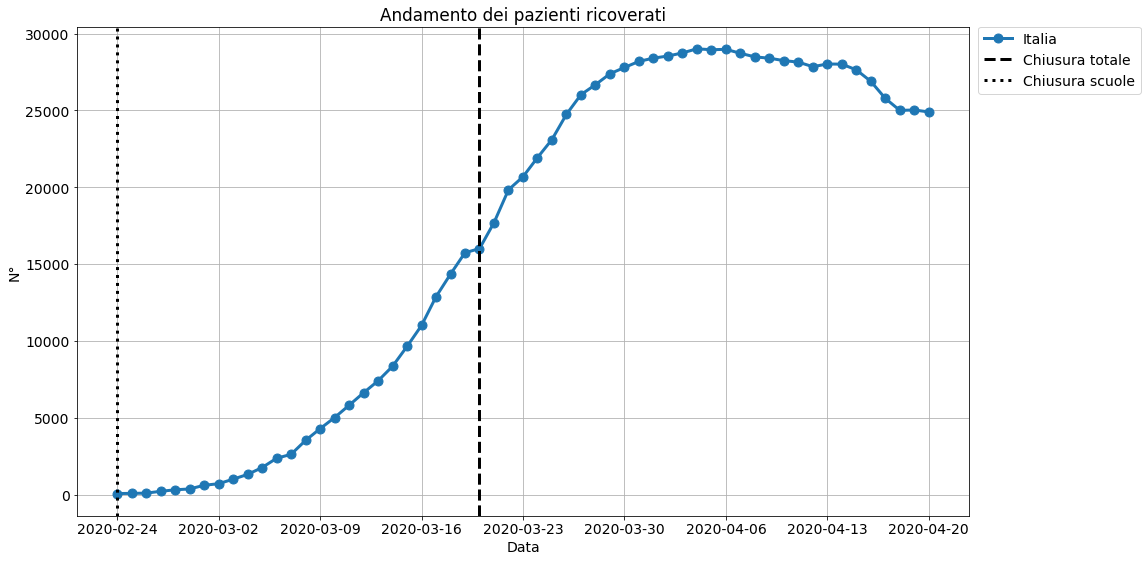

In [195]:
dataset_measures = pd.read_csv("Datasets/ContainmentMeasures/containment_measures_clean.csv")
italia = dataset_measures[dataset_measures['Country']=='Italy']

#data_stato_emergenza = min(italia[italia['Keywords']=='public announcement, special management arrangements, state of emergency']['Date Start'].unique().tolist())
data_chiusura_totale = min(italia[italia['Keywords']=='blanket isolation - no symptoms, compulsory isolation, domestic travel ban, outdoor gatherings banned, public green closure, sports cancellation']['Date Start'].unique().tolist())
data_chiusura_scuole = min(italia[italia['Keywords']=='school closure, university closure']['Date Start'].unique().tolist())

ts_nazione = pd.read_csv("Datasets/ProtezioneCivile/ts_nazioni_ricoverati.csv")

#Imposto l'index = prima colonna, in modo da avere nelle colonne solo i valori utili
ts_nazione.set_index(ts_nazione.columns[0],inplace=True)

#Recupero la lista delle date (X axis)
date = ts_nazione.columns.tolist()
maxDate = max(date)

#Recupero i valori
top_1 = ts_nazione.iloc[0].values.tolist()

#rolling_mean = ts_nazione.iloc[0].T.rolling(window=5).mean()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, top_1,label='Italia',linewidth=3.0,marker='o',markersize=9)
#ax.plot(date, rolling_mean,label='Media mobile',linewidth=2.0)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti ricoverati' )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

ax.axvline(x=data_chiusura_totale,linewidth=3, linestyle='--',color='black',label='Chiusura totale')
ax.axvline(x=data_chiusura_scuole,linewidth=3, linestyle=':',color='black', label='Chiusura scuole')

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()


### Informazioni sulle terapie intensive

Abbiamo estrapolato le informazioni relative ai posti letto di vari reparti ospedalieri delle tre maggiori regioni colpite.  
Inoltre, abbiamo preso in considerazione solamente i tre reparti in cui vengono ricoverati i pazienti in caso di insufficienti posti di "Terapia intensiva", ovvero "Malattie infettive e tropicali" e "Pneumologia".  
Vediamo come i posti disponibili nella Lombardia siano maggiori rispetto alle altre regioni, permettendo quindi di sostenere maggiormente il carico dei pazienti di COVID19.

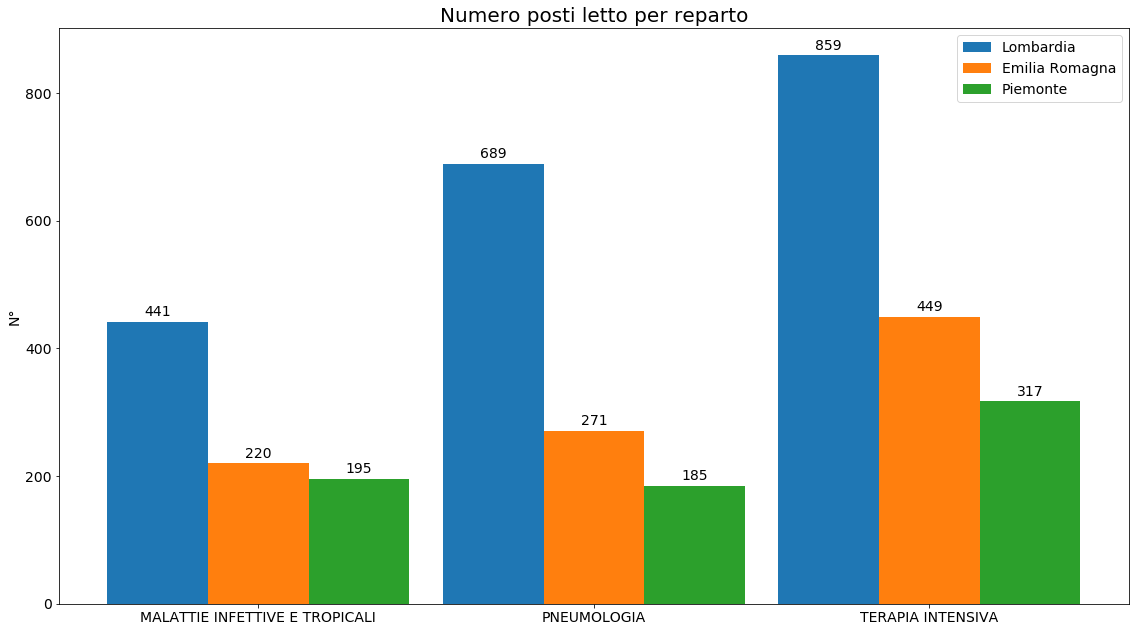

In [122]:
terapie_intensive = pd.read_csv("Datasets/TerapiaIntensiva/Totale_posti_terapie_intensive_per_regione.csv")

terapie_intensive = terapie_intensive[terapie_intensive['Descrizione Regione'].isin(['LOMBARDIA','EMILIA ROMAGNA','PIEMONTE'])]

label = terapie_intensive['Descrizione disciplina'].unique().tolist()

lombardia = terapie_intensive[terapie_intensive['Descrizione Regione']=='LOMBARDIA']['Totale posti letto'].values
eRomagna = terapie_intensive[terapie_intensive['Descrizione Regione']=='EMILIA ROMAGNA']['Totale posti letto'].values
piemonte = terapie_intensive[terapie_intensive['Descrizione Regione']=='PIEMONTE']['Totale posti letto'].values

#Preparo il grafico
x = np.arange(len(label))
width = 0.3 

fig, ax = plt.subplots(figsize=(16,9))
axLombardia = ax.bar(x - width, lombardia, width, label='Lombardia')
axERomagna = ax.bar(x, eRomagna, width, label='Emilia Romagna')
axPiemonte = ax.bar(x + width, piemonte, width, label='Piemonte')

# Customizzazioni
ax.set_ylabel('N°')
ax.set_title('Numero posti letto per reparto', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

#Richiamo la funzione autolabel per mettere delle etichette sopra le barre
autolabel(axLombardia)
autolabel(axERomagna)
autolabel(axPiemonte)

fig.tight_layout()

plt.show()

### Andamento Terapia Intensiva Lombarda e Posti Disponibili

Andiamo ora ad analizzare la curva dei pazienti ricoverati in terapia intensiva nel territorio lombardo.  
Possiamo vedere come il numero di posti utilizzati sia superiore al numero di posti in Terapia Intensiva disponibili, tuttavia utilizzando anche gli altri reparti (Pneumologia e Malattie Infettive) si riesce ad incrementare il numero massimo in modo da non essere a rischio saturazione.  
Nel grafico è presente anche la variazione giornaliera, sotto forma di istogramma, dove viene evidenziato come dal mese di Aprile, i ricoverati nelle Terapie Intensive stiano diminuendo giornalmente.

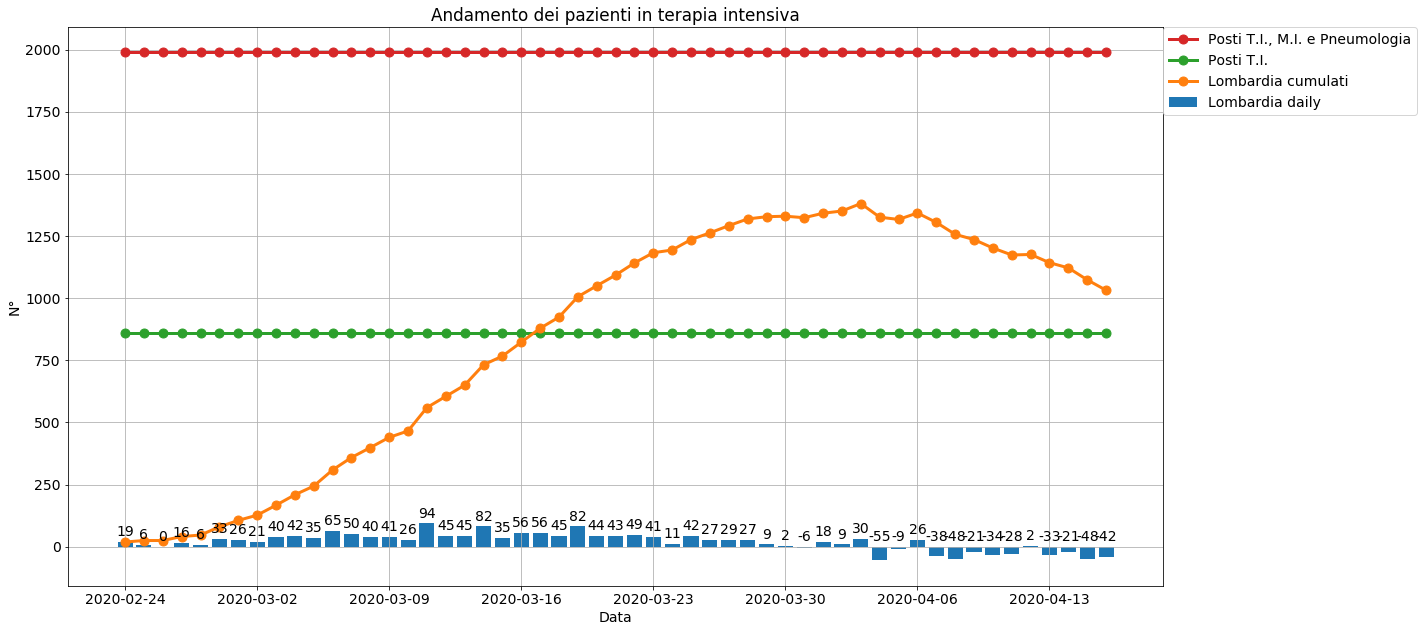

In [142]:
ts_regioni = pd.read_csv("Datasets/ProtezioneCivile/ts_regioni_terapia.csv")
ts_lombardia_daily = pd.read_csv("Datasets/ProtezioneCivile/ts_regioni_terapia_daily_lombardia.csv")
posti_terapie_intensive = pd.read_csv("Datasets/TerapiaIntensiva/Totale_posti_terapie_intensive_per_regione.csv")

posti_terapie_intensive = posti_terapie_intensive[posti_terapie_intensive['Descrizione Regione']=='LOMBARDIA']

#Estraggo la lombardia
ts_regioni =ts_regioni[ts_regioni['denominazione_regione']=='Lombardia']
ts_regioni.set_index('denominazione_regione',inplace=True)
ts_lombardia_daily.set_index('denominazione_regione',inplace=True)

#Recupero le date (X axis)
date = ts_regioni.columns.tolist()
maxDate = max(date)

#Recupero le label
label_regione = 'Lombardia cumulati'
label_daily = 'Lombardia daily'
label_posti_terapie = 'Posti T.I.'
label_posti_terapie_tot = 'Posti T.I., M.I. e Pneumologia'

#recupero i valori
lombardia = ts_regioni.iloc[0].values.tolist()
lombardia_daily = ts_lombardia_daily.iloc[0].values.tolist()
posti_terapie_intensive_grafo = posti_terapie_intensive[posti_terapie_intensive['Descrizione disciplina']=='TERAPIA INTENSIVA']['Totale posti letto'].values.tolist() * len(lombardia)
posti_terapie_intensive_tot = [posti_terapie_intensive['Totale posti letto'].sum()] * len(lombardia)


#Create the plot
fig, ax = plt.subplots(figsize=(20,9))
ax.plot(date, posti_terapie_intensive_tot,label=label_posti_terapie_tot,linewidth=3.0,marker='o',markersize=9,color='tab:red')
ax.plot(date, posti_terapie_intensive_grafo,label=label_posti_terapie,linewidth=3.0,marker='o',markersize=9,color='tab:green')
ax.plot(date, lombardia,label=label_regione,linewidth=3.0,marker='o',markersize=9,color='tab:orange')
rect = ax.bar(date,lombardia_daily,label=label_daily, color='tab:blue')


#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti in terapia intensiva' )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)

def autolabel(rects):
    for rect in rects:
        height = int(rect.get_height())
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, (height if height>0 else 0)),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

#Richiamo la funzione autolabel per mettere delle etichette sopra le barre
autolabel(rect)

fig.tight_layout()

#Show plot
plt.show()

### Confronto Terapia Intensiva Lombardia e Italia

Lo scopo di questo grafico è evidenziare come una singola regione, ovvero la Lombardia, incida quasi per il 40% sul numero dei ricoverati in terapia intensiva a livello nazionale.  
Essendo inoltre la più colpita dall'emergenza è possibile ipotizzare che questa percentuale vada ad aumentare sempre di più nei prossimi giorni.

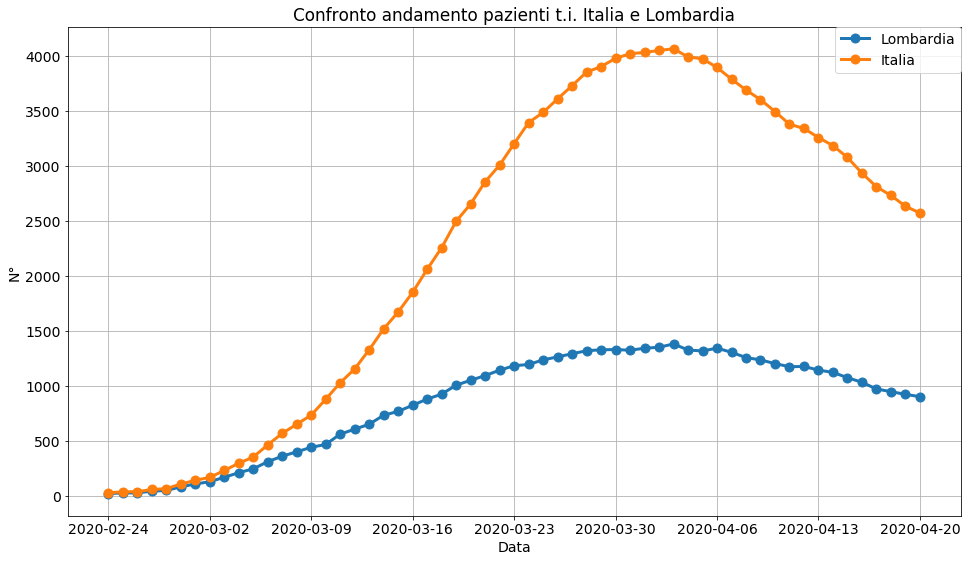

In [166]:
ts_nazione = pd.read_csv("Datasets/ProtezioneCivile/ts_nazioni_terapia.csv")
ts_regioni = pd.read_csv("Datasets/ProtezioneCivile/ts_regioni_terapia.csv")

#Estraggo la lombardia
ts_regioni =ts_regioni[ts_regioni['denominazione_regione']=='Lombardia']
ts_regioni.set_index('denominazione_regione',inplace=True)

#Imposto l'index = prima colonna, in modo da avere nelle colonne solo i valori utili
ts_nazione.set_index(ts_nazione.columns[0],inplace=True)

#Recupero la lista delle date (X axis)
date = ts_regioni.columns.tolist()
maxDate = max(date)

#recupero i valori
lombardia = ts_regioni.iloc[0].values.tolist()
italia = ts_nazione.iloc[0].values.tolist()
#rolling_mean = ts_nazione.iloc[0].T.rolling(window=5).mean()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, lombardia,label='Lombardia',linewidth=3.0,marker='o',markersize=9)
ax.plot(date, italia,label='Italia',linewidth=3.0,marker='o',markersize=9)
#ax.plot(date, rolling_mean,label='Media mobile',linewidth=2.0)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Confronto andamento pazienti t.i. Italia e Lombardia' )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()


### Casi giornalieri in Lombardia

Poniamo la lente sul caso specifico lombardo. Con questo grafico vediamo l'andamento dei casi giornalieri dall'inizio dell'epidemia, abbiamo aggiunto anche una curva rappresentante la media mobile, per cercare identificare un trend "storico" (essendo la durata del fenomeno di soli un paio di mesi).

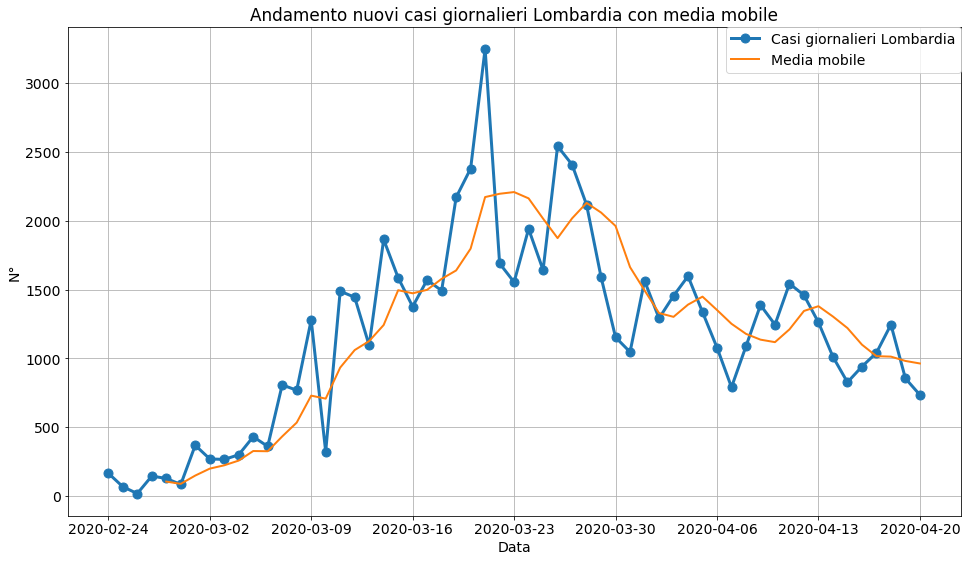

In [165]:
pcProvinciaDataset = pd.read_csv("Datasets/ProtezioneCivile/dpc-covid19-ita-regioni_clean.csv")

#Recupero le date (X axis)
date = pcProvinciaDataset["data"].unique().tolist()
maxDate = max(date)

#Recupero le liste dei nuovi casi giornalieri per la Lombardia
lombardia = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Lombardia']
lombardiaNuoviCasi = lombardia['nuovi_positivi'].values
rolling_mean = lombardia['nuovi_positivi'].rolling(window=5).mean()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(date, lombardiaNuoviCasi,label='Casi giornalieri Lombardia',linewidth=3.0,marker='o',markersize=9)
ax.plot(date, rolling_mean,label='Media mobile',linewidth=2.0)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento nuovi casi giornalieri Lombardia con media mobile' )
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

## Riferimenti ai dataset utilizzati
Posti Letto Ospedali: http://www.dati.salute.gov.it/dati/dettaglioDataset.jsp?menu=dati&idPag=96  
Protezione Civile: https://github.com/pcm-dpc/COVID-19  
Francia: https://github.com/opencovid19-fr/data  
Open/Line_List: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset  
Mondo: https://www.kaggle.com/imdevskp/corona-virus-report  
Istat: http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1  
GDP: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2018&start=2018&view=bar  
Health: https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS  
Containment Measures: https://www.kaggle.com/paultimothymooney/covid19-containment-and-mitigation-measures